# Практическая работа №1: 
### Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр.0392 Частухин Даниил, вариант 87.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных
аддитивных цепочек для заданного числа, привить навык использования
систем компьютерной математики для реализации алгоритмов.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты
содержательно проинтерпретировать.

## Основные теоретические положения



**Бинарный метод:** 

1) Записать число в бинарном виде

2) Отбросить старший бит

3) Созать вспомогательную строку, в которую подряд записывать: SX, если бит равен единице, S - нулю.

4) Произвести вычисления: S - возведение в квадрат, а X - умножение на x


**Метод множителей:**

1) $n = pq$, где $p$ - наименьший простой множитель $n$. Таким образом, $x^n$ можно найти, вычислив $(x^p)^q$

2) Если n - простое, то можно сначала вычислить $x^{n - 1}$ и умножить на $x$
 и умножить его на x
 
3) При $n = 1$ получим $x^{n}$ без вычислений.





Аддитивная цепочка для n - последовательность натуральных чисел
$$ 1 = a_0, a_1, ..., a_r = n, $$
где каждый элемент последователньости равен сумме каких-либо двух предыдущих.

* $l(n)$ - наименьшая длина аддитивной цепочки

* $\lambda(n) =  \lfloor\log_2(n)\rfloor $

* $\nu(n)$ - вес Хэмминга (число единиц в двоичной записи числа)

Метод множителей: $ \quad l(mn) \le l(m) + l(n) $

m-арный метод: $ \quad l(n) \le m - 2 + (k + 1)t \quad [m = 2^k, n = \sum_{j = 0}^t d_j m^{t-j}] $



### Свойства цепочек:
* Элементы строго возрастают
* Одинаковые числа в цепочке опускаются
* Пара $ (j, k), 0 \le k \le j < i $ называется шагом $i$
* Если $\exists$ более чем 1 пара $ (j, k) $, полагаем $ max \hspace{0.2cm} j $


### Виды шагов:
* удвоение: $ j = k = i - 1 $
* звёздный шаг: $ j = i - 1 $
* малый шаг: $ \lambda (a_i) = \lambda (a_i - 1) $
### Свойства видов шагов:
* шаг 1 - всегда удвоение
* удвоение - звёздный шаг, но никогда не малый
* если $i$-ый шаг не малый, то $(i+1)$-ый шаг либо малый, либо звёздный, либо оба
* за удвоением всегда следует звёздный шаг
* если $(i+1)$-ый шаг не звёздный и не малый, то $i$-ый шаг должен быть малым

### Теорема:

Если аддитивная цепочка содержит $d$ и $f = r - d$ неудвоений, то $n \le 2^{d-1} F_{f+3}$

### Следствие:

Если аддитивная цепочка содержит $f$ удвоений и $S$ малых шагов, то

${S \le f \le} {S \over {1 - \log_2(\varphi)}}$
### Алгоритм Брауэра:

Для $n \in ℕ$ при заданном $k \in ℕ$ можно построить цепочку Брауэра с помощью формулы:

$$ B_k (n) =
\begin{cases}
1, 2, 3, ..., 2^k - 1, \quad n < 2^k \\
B_k (q), 2q, 4q, ..., 2^k q, n, \quad n \ge 2^k
\end{cases} \\
q = \lfloor {n \over 2^k} \rfloor
$$

Данная цепочка имеет длину
$$l_B (n) = j(k + 1) + 2^k - 2,$$
при условии что $jk \le \lambda (n) \le (j+1)k$

Длина будет минимализирована для больших $n$, если положить $k = \lambda \lambda (n) - 2 \lambda \lambda \lambda (n)$

**Алгоритм:**

* Задаётся $k$
Вычисляются вспомогательные числа:
$$
d = 2^k, \hspace{0.2cm} q_1 = [ {n \over d} ], \hspace{0.2cm} r_1 = n \hspace{0.2cm} mod \hspace{0.2cm} d \longrightarrow n = q_1 d + r_1 \quad (0 \le r_1 < d) \\
q_2 = [ {q_1 \over d} ], \hspace{0.2cm} r_2 = q_1 \hspace{0.2cm} mod \hspace{0.2cm} d \longrightarrow q_1 = q_2 d + r_2 \quad (0 \le r_2 < d)
$$
* Данная процедура продолжается, пока не появится $q_s < d,$ следовательно $q_{s-1} = q_s d + r_s$
* Таким образом, n имеет вид
$$ n = 2^k q_1 + r_1 = 2^k (2^k q_2 + r_2) + r_1 = ...\\
... = 2^k (2^k (... (2^k q_s + r_s ) ... ) + r_2 ) + r_1 . $$

$$B_n (n): 1, 2, 3, ... 2^k - 1, \\
2q_s, 4q_s, 8q_s, ... 2^k q_s, 2^k q_s + r_s, \\
2q_{s-1}, 4q_{s-1}, 8q_{s-1}, ... 2^k q_{s-1}, 2^k q_{s-1} + r_{s-1}, \\
... \\
... 2^k q_1, 2^k q_1 + r_1 = n.$$

### Алгоритм Яо:

* Обладает такой же вычислительной мощностью, что и алгоритм Брауэра
* $k \ge 2$, $n$ раскладывается в $2^k$-ой системе счисления.
* $$ d(z) = \sum_{i: a_i = z} 2^{ik} $$

**Алгоритм**:

* Базовая последовательность: $1, 2, 4, ..., 2^{\lambda(n)}$
* Вычисляются значения $d(z)$ для всех $z \in \{ 1, 2, ..., 2^k - 1\}, \quad d(z) \ne 0$
* Вычисляются значения $zd(z)$ для всех $z$
* n представляетсяв виде
$$ n = \sum_{z = 1}^{2^k - 1} zd(z) $$


## Алгоритм дробления вектора индексов
**Алгоритм**:

1) Исходный вектор ${1, 2, ... m}$ по которому строится исходная цепочка цепочка ${a_1 = 1, a_2, ..., a_{m+1}}$

2) Если $a_{m+1}=n$ - алгоритм завершается. Иначе вектор делится на изменяемую и неизменяемую части.

3) Находятся границы $a_{max} = a_{q} \cdot 2^{n - q}$  и  $a_{min} = a_{q+1} + m - q$, где $q$ - длина неизменяемой части. Если $n\in [ a_{min}, a_{max}]$, перебираются все возможные изменяемые части.

4) Если цепочка при данной неизменяемой части не была найдена, то изменяемая часть принимает первоначальное значение, а неизменяемая декрементируется.

5) Если были перебраны все варианты обоих частей вектора, то вектор длина вектора увеличивается на единицу и принимает значение ${1, 2, ... m + 1}$

6) Алгоритм продолжается, пока не будет найдена цепочка.

7) Замечание: имеет смысл принять граничными значениями длины вектора $l \in [\lfloor\log_2(n)\rfloor, \lfloor\log_2(n)\rfloor + \nu(n)]$

### №1 Бинарный метод и метод множителей

1) $ n = 666 $
* Бинарный метод: 
$n = 666 = 1|010011010_2 = SSXSSSXSXSSXS$
<br>
Где $ S = x^{2}, X = x*x $
<br>
$Последовательность: x, x^{2}, x^{4}, x^{5}, x^{10}, x^{20}, x^{40}, x^{41}, x^{82}, x^{83}, x^{166}, x^{332}, x^{333}, x^{666}$
<br>
Число операций = 13
<br>
<br>
* Метод множителей: 
$n = 666 = 2 * 3^{2} * 37 = (((x^{37})^{3})^{3})^{2} = (((((x^{2})^{2})^{3})^{3} * x)^{3})^{3})^{2}$
<br>
$ x, x^{2}, x^{3} $ 2 операции
<br>
$ x, x^{2} $ = 1 операция
<br>
$ x * x $ = 1 операция
<br>
Итого число операций $ 2*4 + 3*1 + 1 = 12 $
<br>
<br>
У метода множителей меньше операций


2) $ n = 99 $
* Бинарный метод: 
$n = 99 = 1|100011_2 = SXSSSSXSX$
<br>
$Последовательность: x, x^{2}, x^{3}, x^{6}, x^{12}, x^{24}, x^{48}, x^{49}, x^{98}, x^{99}$
<br>
Число операций = 9
<br>
<br>
* Метод множителей: 
$n = 99 = 3^{2} * 11 = (((x^{2})^{5})*x)^{3})^{3}$
$ x, x^{2}, x^{4}, x^{5} $ 3 операции
<br>
$ x, x^{2}, x^{3} $ 2 операции
<br>
$ x, x^{2} $ = 1 операция
<br>
$ x * x $ = 1 операция
<br>
Итого число операций $ 1 + 1 + 3 + 2*2 = 9 $
<br>
<br>
Число операций одинаково


3) $ n = 153 $
* Бинарный метод: 
$n = 153 = 1|0011001_2 = SSSXSXSSSX$
<br>
$Последовательность: x, x^{2}, x^{4}, x^{8}, x^{9}, x^{18}, x^{19}, x^{38}, x^{76}, x^{152}, x^{153}$
<br>
Число операций = 10
<br>
<br>
* Метод множителей: 
$n = 99 = 3^{2} * 17 = (((x^{4})^{4})*x)^{3})^{3}$
$ x, x^{2}, x^{4} $ 2 операции
<br>
$ x, x^{2}, x^{3} $ 2 операции
<br>
$ x * x $ = 1 операция
<br>
Итого число операций $ 1 + 2*2 + 2*2 = 9 $
<br>
<br>
Число операций одинаково

Итог: метод множителей немного оптимальнее, однако бинарный метод довольно просто реализуется, из-за чего тоже может быть применим

### №2 Алгоритм Брауэра

Реализуем сам алгоритм

In [23]:
def Brauer(n, k):
    chain = [] # список аддитивной цепочки
    div = [] # список частных и остатков
    p = n
    d = 2**k
    
    # Раскладываем число по модулю 2^k
    div.append([n, 0])
    while(p//d >= 1):
        div.append([p//d, p%d])
        p //= d
    div = div[::-1]
    
    # Записываем первые элементы цпочки от 1 до qs
    for i in range(1, div[0][0]+1):
        chain.append(i)
    
    # Делаем цикл, пока послений элемент цепочки не будет равен n
    it = 1
    while (chain[-1] != n):
        # Удваиваем последний элемент цепочки, если результат не будет превосходить qn
        if (chain[-1]+chain[-1] <= div[it][0]):
            chain.append(chain[-1]+chain[-1])
        # Либо прибавляем к последнему элементу остаток по модулю rn
        else:
            chain.append(chain[-1]+div[it-1][1])
            it += 1
        
    return chain

Протестируем на примере (взят из практики)
    $$n = 31415$$
    $$k = 3$$

In [24]:
chain = Brauer(31415, 3)
print(chain)
print("Size of chain: ", len(chain)-1) # len(ch)-1, так как первый элемент "1" не учитывается

[1, 2, 3, 4, 5, 6, 7, 14, 28, 56, 61, 122, 244, 488, 490, 980, 1960, 3920, 3926, 7852, 15704, 31408, 31415]
Size of chain:  22


    [1, 2, 3, 4, 5, 6, 7, 14, 28, 56, 61, 122, 244, 488, 490, 980, 1960, 3920, 3926, 7852, 15704, 31408, 31415]
    Size of chain:  22

Будем варьировать число k и посмотрим на графике, как будут меняться длины цепочек
<br>
n оставим прежним

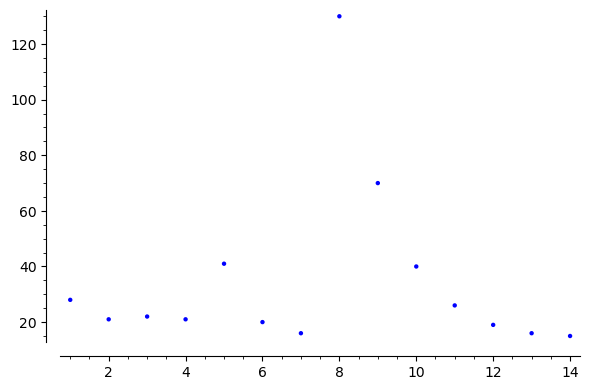

Min chain size:  15
k:  14


In [25]:
lens = []
n = 31415

for k in range(1, 15):
    lens.append(len(Brauer(n, k)) - 1)
    
g = point((i+1 , lens[i]) for i in range (0, 14))
g.show()
print("Min chain size: ", min(lens))
print("k: ", lens.index(min(lens)) + 1)

    Min chain size:  15
    k:  14

Посмотрим для n = 3141592 

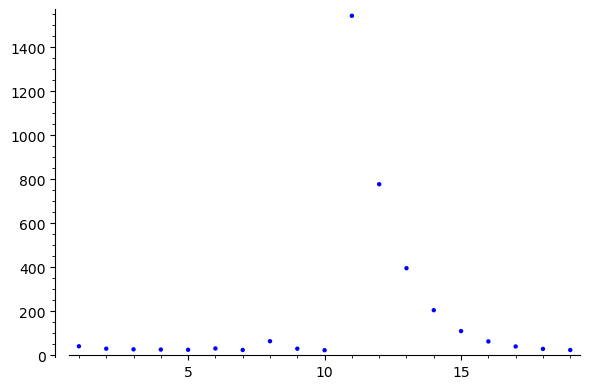

Min chain size:  23
k:  10


In [26]:
lens = []
n = 3141592

for k in range(1, 20):
    lens.append(len(Brauer(n, k)) - 1)
    
g = point((i+1 , lens[i]) for i in range (0, 19))
g.show()
print("Min chain size: ", min(lens))
print("k: ", lens.index(min(lens)) + 1)

   
    Min chain size:  23
    k:  10

В теории говорится, что длина будет минимизирована для больших n, если положить, что 
<br>
$$ k = λ(λ(n)) - 2λ(λ(λ(n))) $$
<br>
Высчитаем k из формулы и сравним с k из минимальной цепочки метода Брауэра
<br>
<br>
*Для примера и далее возьмём последовательность цифр числа π*

In [40]:
n = 31415926535897932384626433832795028841971693993751058209749445923078164062862
real_k = math.log2(math.log2(n))-2*math.log2(math.log2(math.log2(n)))

lens = []
for k in range(1, 30):
    lens.append(len(Brauer(n, k))-1)
Brauer_k = lens.index(min(lens))+1

print("Min chain size: ", min(lens), "  With k: ", Brauer_k)
print("k from formula: ", real_k)

Min chain size:  264   With k:  28
k from formula:  1.993196888882876


    Min chain size:  264   With k:  28
    k from formula:  1.993196888882876

Теоретический k сильно расходится с практикой при мильно больших n 
<br>
Теперь переберём все k от 1 до 15, а для каждого k переберём n от 5 до 150 тысяч, и посмотрим, как варьируется k с минимальной цепочкой

In [38]:
for k in range(1, 16):
    lens = []
    for n in range(5000, 150000):
        lens.append(len(Brauer(n, k))-1)
    print("k: " + str(k) + "  Min size: " + str(min(lens)) + "   Average size:", sum(lens)//len(lens))

k: 1  Min size: 23   Average size: 30
k: 2  Min size: 17   Average size: 22
k: 3  Min size: 15   Average size: 20
k: 4  Min size: 14   Average size: 20
k: 5  Min size: 14   Average size: 21
k: 6  Min size: 13   Average size: 31
k: 7  Min size: 15   Average size: 25
k: 8  Min size: 17   Average size: 71
k: 9  Min size: 18   Average size: 159
k: 10  Min size: 14   Average size: 85
k: 11  Min size: 13   Average size: 48
k: 12  Min size: 13   Average size: 30
k: 13  Min size: 13   Average size: 166
k: 14  Min size: 14   Average size: 856
k: 15  Min size: 15   Average size: 3630


    k: 1  Min size: 23   Average size: 30
    k: 2  Min size: 17   Average size: 22
    k: 3  Min size: 15   Average size: 20
    k: 4  Min size: 14   Average size: 20
    k: 5  Min size: 14   Average size: 21
    k: 6  Min size: 13   Average size: 31
    k: 7  Min size: 15   Average size: 25
    k: 8  Min size: 17   Average size: 71
    k: 9  Min size: 18   Average size: 159
    k: 10  Min size: 14   Average size: 85
    k: 11  Min size: 13   Average size: 48
    k: 12  Min size: 13   Average size: 30
    k: 13  Min size: 13   Average size: 166
    k: 14  Min size: 14   Average size: 856
    k: 15  Min size: 15   Average size: 3630

Итог: для очень больших n формула k из теории неоптимально. Для n не очень больших k варьируется от 3 до 7, для значений от 8 до 15 минимальные цепочки нормальные, средний размер всех этих цепочек становится заметно больше чем у k из диапазона от 3 до 7

### №3 Алгоритм дробления вектора индексов

In [54]:
# Генерация фиксированной части
def generate_fix(q):
    fix = []
    for i in range(1, q+1):
        fix.append(i)
    return fix

In [55]:
# Генерация меняющейся части
def generate_dyn(q, m):
    din = []
    for i in range(q+1, m+1):
        dyn.append(i)
    return dyn

In [83]:
# Получение звёздной цепочки из вектора индексов
def generate_ch(vec):
    chain = [1]
    for i in vec:
        chain.append(chain[-1]+chain[i-1])
    return chain

In [84]:
# Декрементация части вектора индексов
def dec(vec):
    vec[-1] -= 1
    it = -1
    while(vec[it] == 0):
        vec[it] = len(vec) + it + 1
        it -= 1
        vec[it] -= 1
    return vec

In [99]:
# Проверка на конец части вектора (если вектор {1, .., 1})
def check_end(vec):
    for i in vec:
        if (i != 1):
            return 0
    return 1

In [137]:
# Функция дробления вектора индексов9
def Milling(n):
    ln = math.floor(math.log2(n)) # [log2(n)]
    v = Integer(n).popcount() # функция Хэмминга
    for m in range(ln, ln + v + 1):
        q = m//2 # Делим вектор на две части
        fix = generate_fix(q) # Генерируем фиксированную часть
        dyn = generate_din(q, m) # Генерируем меняющуюся часть
        
        while (1):
            chain = generate_ch(fix+dyn) # Получаем звёздную цепочку
            a_min = chain[q]+m-q
            a_max = chain[q]*2**(m-q)
            
            dyn = generate_din(q, m) # Генерируем меняющуюся часть по новой
            if (chain[m] == n):
                return fix+dyn
            elif (n > a_max or n < a_min):
                if (check_end(fix)):
                    break
                dec(fix) # Декрементируем фиксированную часть
                continue
            while (1):
                chain = generate_ch(fix+dyn)
                if (chain[m] == n):
                    return fix+dyn
                    
                if (check_end(dyn)):
                    break
                dec(dyn) # Декрементируем меняющуюся часть
                
            if (check_end(fix)):
                break
            dec(fix)

In [138]:
import time

In [139]:
start = time.time()
vec = Milling(63)
end = time.time()
chain = generate_ch(vec)

print("Completed in", end-start, "seconds")
print("Vector:", vec)
print("Chain:", chain)

Completed in 0.016112804412841797 seconds
Vector: [1, 2, 2, 1, 5, 6, 7, 5]
Chain: [1, 2, 4, 6, 7, 14, 28, 56, 63]


    Completed in 0.016112804412841797 seconds
    Vector: [1, 2, 2, 1, 5, 6, 7, 5]
    Chain: [1, 2, 4, 6, 7, 14, 28, 56, 63]

Алгоритм работает
<br>
Протестируем его для 5 значений n > 1000

In [126]:
start = time.time()
vec = Milling(2002)
end = time.time()
chain = generate_ch(vec)

print("Completed in", end-start, "seconds")
print("Vector:", vec)
print("Chain:", chain)

Completed in 214.4531328678131 seconds
Vector: [1, 2, 3, 4, 5, 5, 2, 8, 9, 10, 11, 12, 11, 2]
Chain: [1, 2, 4, 8, 16, 32, 48, 50, 100, 200, 400, 800, 1600, 2000, 2002]


    Completed in 214.4531328678131 seconds
    Vector: [1, 2, 3, 4, 5, 5, 2, 8, 9, 10, 11, 12, 11, 2]
    Chain: [1, 2, 4, 8, 16, 32, 48, 50, 100, 200, 400, 800, 1600, 2000, 2002]

In [127]:
start = time.time()
vec = Milling(1856) # Поражение в Крымской войне
end = time.time()
chain = generate_ch(vec)

print("Completed in", end-start, "seconds")
print("Vector:", vec)
print("Chain:", chain)

Completed in 245.26468658447266 seconds
Vector: [1, 2, 3, 4, 5, 5, 4, 8, 9, 10, 11, 12, 8, 4]
Chain: [1, 2, 4, 8, 16, 32, 48, 56, 112, 224, 448, 896, 1792, 1848, 1856]


    Completed in 245.26468658447266 seconds
    Vector: [1, 2, 3, 4, 5, 5, 4, 8, 9, 10, 11, 12, 8, 4]
    Chain: [1, 2, 4, 8, 16, 32, 48, 56, 112, 224, 448, 896, 1792, 1848, 1856]

In [128]:
start = time.time()
vec = Milling(1240) # Невская битва
end = time.time()
chain = generate_ch(vec)

print("Completed in", end-start, "seconds")
print("Vector:", vec)
print("Chain:", chain)

Completed in 18.088226795196533 seconds
Vector: [1, 2, 3, 4, 5, 3, 7, 8, 9, 10, 11, 8, 5]
Chain: [1, 2, 4, 8, 16, 32, 36, 72, 144, 288, 576, 1152, 1224, 1240]


    Completed in 18.088226795196533 seconds
    Vector: [1, 2, 3, 4, 5, 3, 7, 8, 9, 10, 11, 8, 5]
    Chain: [1, 2, 4, 8, 16, 32, 36, 72, 144, 288, 576, 1152, 1224, 1240]

In [129]:
start = time.time()
vec = Milling(1789) # Начало Великой Французской революци
end = time.time()
chain = generate_ch(vec)

print("Completed in", end-start, "seconds")
print("Vector:", vec)
print("Chain:", chain)

Completed in 300.09082436561584 seconds
Vector: [1, 2, 3, 4, 4, 1, 6, 8, 9, 10, 11, 12, 10, 7]
Chain: [1, 2, 4, 8, 16, 24, 25, 49, 98, 196, 392, 784, 1568, 1764, 1789]


    Completed in 300.09082436561584 seconds
    Vector: [1, 2, 3, 4, 4, 1, 6, 8, 9, 10, 11, 12, 10, 7]
    Chain: [1, 2, 4, 8, 16, 24, 25, 49, 98, 196, 392, 784, 1568, 1764, 1789]

In [130]:
start = time.time()
vec = Milling(1480) # Стояние на реке Угре
end = time.time()
chain = generate_ch(vec)

print("Completed in", end-start, "seconds")
print("Vector:", vec)
print("Chain:", chain)

Completed in 10.304410219192505 seconds
Vector: [1, 2, 3, 4, 5, 4, 7, 8, 9, 10, 11, 9, 7]
Chain: [1, 2, 4, 8, 16, 32, 40, 80, 160, 320, 640, 1280, 1440, 1480]


    Completed in 10.304410219192505 seconds
    Vector: [1, 2, 3, 4, 5, 4, 7, 8, 9, 10, 11, 9, 7]
    Chain: [1, 2, 4, 8, 16, 32, 40, 80, 160, 320, 640, 1280, 1440, 1480]

Итог: время работы алгоритма достаточно большое. Дольше всего выполняется для чисел, которое немного меньше степени двойки, а быстрее всего выполняется для чисел немного больших степени двойки

### №4 Гипотеза Шольца-Бауэра

Сама гипотеа:  $ l(2^{n}-1) \leqslant l(n) + n - 1 $ 

In [ ]:
for n in range(1, 13):
    right_vec = Milling(n)
    left_vec = Milling(2**n - 1)
    ln = len(generate_ch(right_vec))
    l2n = len(generate_ch(left_vec))
    print("n:", n, ", l(n):", ln, ", l(2^n - 1): ", l2n)
    print("l(2^n - 1) <= n - 1 + l(n): ", l2n <= ln + n -1)
    print()

    n: 1 , l(n): 1 , l(2^n - 1):  1
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 2 , l(n): 2 , l(2^n - 1):  3
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 3 , l(n): 3 , l(2^n - 1):  5
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 4 , l(n): 3 , l(2^n - 1):  6
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 5 , l(n): 4 , l(2^n - 1):  8
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 6 , l(n): 4 , l(2^n - 1):  9
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 7 , l(n): 5 , l(2^n - 1):  11
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 8 , l(n): 4 , l(2^n - 1):  11
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 9 , l(n): 5 , l(2^n - 1):  13
    l(2^n - 1) <= n - 1 + l(n):  True

    n: 10 , l(n): 5 , l(2^n - 1):  14
    l(2^n - 1) <= n - 1 + l(n):  True
    
    n: 11 , l(n): 6 , l(2^n - 1): 16
    l(2^n - 1) <= n - 1 + l(n):  True
    
    n: 12 , l(n): 5 , l(2^n - 1): 16
    l(2^n - 1) <= n - 1 + l(n):  True

$n$ | $l^*(n)$ | $l^*(2^n - 1)$ | $Теорема$
--- | --- | --- | --- 
1 | 1 | 1 | Выполнена
2 | 2 | 3 | Выполнена
3 | 3 | 5 | Выполнена
4 | 3 | 6 | Выполнена
5 | 4 | 8 | Выполнена
6 | 4 | 9 | Выполнена
7 | 5 | 11 | Выполнена
8 | 4 | 11 | Выполнена
9 | 5 | 13 | Выполнена
10 | 5 | 14 | Выполнена
11 | 6 | 16 | Выполнена
12 | 5 | 16 | Выполнена

Итог: Гипотеза Шольца-Брауэра для n от 1 до 12 верна. Дальнейшее вычисление будет очень долгим для проверки

### Вывод: 
Научился составлять алгоритмы по аддитивным цепочкам, сформировал четкое представление об этой структуре